In [175]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID_COMBINE pol sent NEW.csv',header=None,names=["text","polarity","sentiment"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [176]:
#descriptions
print(messages.describe())

          polarity
count  8910.000000
mean      0.051901
std       0.222052
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.136364
max       1.000000


In [177]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative    1416
neutral     4099
positive    3395
dtype: int64


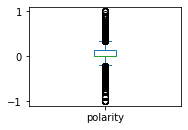

In [178]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [179]:
messages['text']

0       msmagazine nfor valentinesday covid n roses re...
1       todayx xs truckers protest parliament hill bec...
2       bust_magazine nfor valentinesday covid n roses...
3       audreymagazine nfor valentinesday covid n rose...
4                            apreudent kissing coronaviru
                              ...                        
8905    good question rats managed order coming jan de...
8906    prevent spread covid country must work continu...
8907    narratives social formations dominated last tw...
8908    x xci never dealt much death careerx xd nurses...
8909    odisha records low daily caseload th day wait ...
Name: text, Length: 8910, dtype: object

In [180]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
    



for i in range(0,len(messages['text'])):
   
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
   
  
    corpus.append(review)
  

In [181]:
corpus

[['msmagazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['todayx',
  'trucker',
  'protest',
  'parliament',
  'hill',
  'become',
  'canadax',
  'answer',
  'sturgis',
  'superspreader',
  'sans',
  'smash',
  'mo'],
 ['bust',
  'magazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['audreymagazine',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine',
  'yo'],
 ['apreudent', 'kissing', 'coronaviru'],
 ['thedailybeast',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine'],
 ['death',
  'due',
  'omicron',
  'high',
  'delta',
  'cdcgov',
  'nih',
  'thelancetinfdis',
  'cdc',
  'ncezid',
  'infectdisnews'],
 ['theweek',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nviolets',
  'blue',
  'got',
  'vaccine',
  'nan'],
 ['vanityfair',
  'valentinesday',
  'covid',
  'rose',
  'red',
  'nv

In [182]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [183]:
X

['msmagazine valentinesday covid rose red nviolets blue got vaccine ',
 'todayx trucker protest parliament hill become canadax answer sturgis superspreader sans smash mo ',
 'bust magazine valentinesday covid rose red nviolets blue got vaccine ',
 'audreymagazine valentinesday covid rose red nviolets blue got vaccine yo ',
 'apreudent kissing coronaviru ',
 'thedailybeast valentinesday covid rose red nviolets blue got vaccine ',
 'death due omicron high delta cdcgov nih thelancetinfdis cdc ncezid infectdisnews ',
 'theweek valentinesday covid rose red nviolets blue got vaccine nan ',
 'vanityfair valentinesday covid rose red nviolets blue got vaccine ',
 'rumpus valentinesday covid rose red nviolets blue got vaccine ',
 'utnereader valentinesday covid rose red nviolets blue got vaccine ',
 'motherjones valentinesday covid rose red nviolets blue got vaccine ',
 'cpho canada justintrudeau coronavirus covid fordnation celliottability epdevilla jyduclos nsweden decide ',
 'another loss due

In [184]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [186]:
w=messages['sentiment']
type(w)



pandas.core.series.Series

In [187]:
#training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)
import time 
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)
start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MultinomialNB accuracy for COVID INDIA is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)



 time taken by method is 0.0657351016998291 sec
[[193  40  51]
 [ 63 624 122]
 [ 70  67 552]]
MultinomialNB accuracy for COVID INDIA is = 0.7682379349046016
              precision    recall  f1-score   support

    negative       0.59      0.68      0.63       284
     neutral       0.85      0.77      0.81       809
    positive       0.76      0.80      0.78       689

    accuracy                           0.77      1782
   macro avg       0.74      0.75      0.74      1782
weighted avg       0.78      0.77      0.77      1782



In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")


from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("GaussianNB accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.36394572257995605 sec
[[186  21  77]
 [319 372 118]
 [200  47 442]]
GaussianNB accuracy COVID  is = 0.5611672278338945
              precision    recall  f1-score   support

    negative       0.26      0.65      0.38       284
     neutral       0.85      0.46      0.60       809
    positive       0.69      0.64      0.67       689

    accuracy                           0.56      1782
   macro avg       0.60      0.59      0.55      1782
weighted avg       0.69      0.56      0.59      1782



In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import BernoulliNB
spam_detect_model=BernoulliNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

#from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("BernoulliNB accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.1638634204864502 sec
[[178  50  56]
 [ 41 662 106]
 [ 62  80 547]]
BernoulliNB accuracy COVID  is = 0.7783389450056116
              precision    recall  f1-score   support

    negative       0.63      0.63      0.63       284
     neutral       0.84      0.82      0.83       809
    positive       0.77      0.79      0.78       689

    accuracy                           0.78      1782
   macro avg       0.75      0.75      0.75      1782
weighted avg       0.78      0.78      0.78      1782



In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
spam_detect_model=LogisticRegression(multi_class='ovr').fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LogisticRegression accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.05293917655944824 sec
[[186  65  33]
 [  8 773  28]
 [ 20  93 576]]
LogisticRegression accuracy COVID   is = 0.8613916947250281
              precision    recall  f1-score   support

    negative       0.87      0.65      0.75       284
     neutral       0.83      0.96      0.89       809
    positive       0.90      0.84      0.87       689

    accuracy                           0.86      1782
   macro avg       0.87      0.82      0.83      1782
weighted avg       0.87      0.86      0.86      1782



In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.ensemble import RandomForestClassifier
spam_detect_model=RandomForestClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")


from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("RandomForestClassifier accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.4344956874847412 sec
[[198  50  36]
 [  7 783  19]
 [ 20  75 594]]
RandomForestClassifier accuracy COVID  is = 0.8838383838383839
              precision    recall  f1-score   support

    negative       0.88      0.70      0.78       284
     neutral       0.86      0.97      0.91       809
    positive       0.92      0.86      0.89       689

    accuracy                           0.88      1782
   macro avg       0.89      0.84      0.86      1782
weighted avg       0.89      0.88      0.88      1782



In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier
spam_detect_model=DecisionTreeClassifier().fit(X_train,y_train)

sstart=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("DecisionTreeClassifier accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 57.01412868499756 sec
[[194  49  41]
 [ 26 739  44]
 [ 34  76 579]]
DecisionTreeClassifier accuracy COVID  is = 0.8484848484848485
              precision    recall  f1-score   support

    negative       0.76      0.68      0.72       284
     neutral       0.86      0.91      0.88       809
    positive       0.87      0.84      0.86       689

    accuracy                           0.85      1782
   macro avg       0.83      0.81      0.82      1782
weighted avg       0.85      0.85      0.85      1782



In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

spam_detect_model=KNeighborsClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("KNeighborsClassifier accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 121.90632176399231 sec
[[ 32 240  12]
 [  4 795  10]
 [  3 444 242]]
KNeighborsClassifier accuracy COVID   is = 0.5998877665544332
              precision    recall  f1-score   support

    negative       0.82      0.11      0.20       284
     neutral       0.54      0.98      0.69       809
    positive       0.92      0.35      0.51       689

    accuracy                           0.60      1782
   macro avg       0.76      0.48      0.47      1782
weighted avg       0.73      0.60      0.54      1782



In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#spam_detect_model=LinearDiscriminantAnalysis().fit(X_train,y_train)
model = LinearDiscriminantAnalysis().fit(X_train, y_train)


start=time.time()
y_pred= model.predict(X_test)
#model=model.decision_function(X_test)
#=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearDiscriminantAnalysis accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.06408143043518066 sec
[[208  47  29]
 [ 34 708  67]
 [ 43 119 527]]
LinearDiscriminantAnalysis accuracy COVID   is = 0.8097643097643098
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73       284
     neutral       0.81      0.88      0.84       809
    positive       0.85      0.76      0.80       689

    accuracy                           0.81      1782
   macro avg       0.80      0.79      0.79      1782
weighted avg       0.81      0.81      0.81      1782



In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import LinearSVC

spam_detect_model=LinearSVC(max_iter=5000)
spam_detect_model=spam_detect_model.fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearSVC accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.022254228591918945 sec
[[215  36  33]
 [ 26 740  43]
 [ 31  68 590]]
LinearSVC accuracy COVID  is = 0.867003367003367
              precision    recall  f1-score   support

    negative       0.79      0.76      0.77       284
     neutral       0.88      0.91      0.90       809
    positive       0.89      0.86      0.87       689

    accuracy                           0.87      1782
   macro avg       0.85      0.84      0.85      1782
weighted avg       0.87      0.87      0.87      1782



In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import SVC

spam_detect_model= SVC().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("SVC accuracy COVID is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 82.64691543579102 sec
[[129 121  34]
 [  0 790  19]
 [ 13 144 532]]
SVC accuracy COVID is = 0.8142536475869809
              precision    recall  f1-score   support

    negative       0.91      0.45      0.61       284
     neutral       0.75      0.98      0.85       809
    positive       0.91      0.77      0.84       689

    accuracy                           0.81      1782
   macro avg       0.86      0.73      0.76      1782
weighted avg       0.84      0.81      0.80      1782



In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.ensemble import AdaBoostClassifier

spam_detect_model=AdaBoostClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("AdaBoostClassifier accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 1.5563511848449707 sec
[[153 109  22]
 [  5 795   9]
 [ 26 226 437]]
AdaBoostClassifier accuracy COVID   is = 0.7772166105499438
              precision    recall  f1-score   support

    negative       0.83      0.54      0.65       284
     neutral       0.70      0.98      0.82       809
    positive       0.93      0.63      0.76       689

    accuracy                           0.78      1782
   macro avg       0.82      0.72      0.74      1782
weighted avg       0.81      0.78      0.77      1782



In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import RidgeClassifier
spam_detect_model=RidgeClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("RidgeClassifier accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.043692588806152344 sec
[[207  51  26]
 [ 21 742  46]
 [ 22 113 554]]
RidgeClassifier accuracy COVID   is = 0.8434343434343434
              precision    recall  f1-score   support

    negative       0.83      0.73      0.78       284
     neutral       0.82      0.92      0.87       809
    positive       0.88      0.80      0.84       689

    accuracy                           0.84      1782
   macro avg       0.84      0.82      0.83      1782
weighted avg       0.85      0.84      0.84      1782



In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import PassiveAggressiveClassifier
spam_detect_model=PassiveAggressiveClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("PassiveAggressiveClassifier accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.04044985771179199 sec
[[216  38  30]
 [ 48 706  55]
 [ 37  74 578]]
PassiveAggressiveClassifier accuracy COVID  is = 0.8417508417508418
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74       284
     neutral       0.86      0.87      0.87       809
    positive       0.87      0.84      0.86       689

    accuracy                           0.84      1782
   macro avg       0.82      0.82      0.82      1782
weighted avg       0.84      0.84      0.84      1782



In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import Perceptron
spam_detect_model=Perceptron().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Perceptron accuracy COVID   is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.04819655418395996 sec
[[212  38  34]
 [ 35 721  53]
 [ 35  73 581]]
Perceptron accuracy COVID   is = 0.8496071829405163
              precision    recall  f1-score   support

    negative       0.75      0.75      0.75       284
     neutral       0.87      0.89      0.88       809
    positive       0.87      0.84      0.86       689

    accuracy                           0.85      1782
   macro avg       0.83      0.83      0.83      1782
weighted avg       0.85      0.85      0.85      1782



In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neural_network import MLPClassifier
spam_detect_model=MLPClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MLPClassifier accuracy COVID  is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0845334529876709 sec
[[195  42  47]
 [ 35 713  61]
 [ 43  67 579]]
MLPClassifier accuracy COVID  is = 0.8344556677890012
              precision    recall  f1-score   support

    negative       0.71      0.69      0.70       284
     neutral       0.87      0.88      0.87       809
    positive       0.84      0.84      0.84       689

    accuracy                           0.83      1782
   macro avg       0.81      0.80      0.81      1782
weighted avg       0.83      0.83      0.83      1782



In [231]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6     positive
7      neutral
8      neutral
9      neutral
10     neutral
11     neutral
12     neutral
13    negative
14     neutral
15     neutral
16     neutral
17     neutral
18    negative
19     neutral
Name: sentiment, dtype: object


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=uint8)

Accuracy COVID INDIA of the LR model is for neutral class 0.888327721661055
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.954


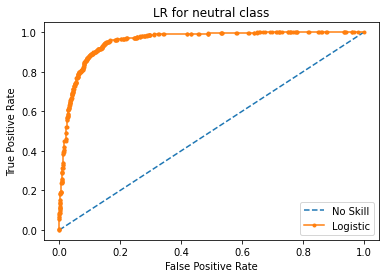

In [232]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy COVID INDIA  of the LinearSVC model is for neutral class 0.8973063973063973
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.897


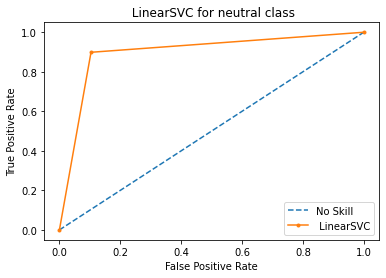

In [233]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the LinearSVC model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [234]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6     positive
7      neutral
8      neutral
9      neutral
10     neutral
11     neutral
12     neutral
13    negative
14     neutral
15     neutral
16     neutral
17     neutral
18    negative
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy COVID INDIA  of the LR model is for positive class 0.8995510662177328
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.947


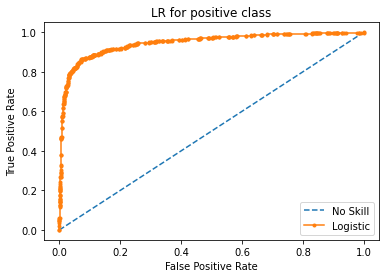

In [235]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the LR model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy COVID INDIA  of the LinearSVC model is for positive class 0.8973063973063973
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.897


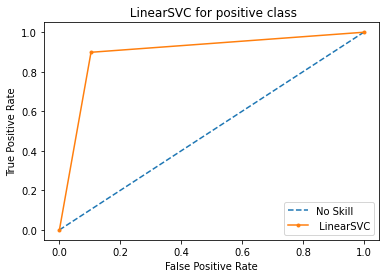

In [249]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC(max_iter=2000)
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the LinearSVC model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [237]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,0].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6     positive
7      neutral
8      neutral
9      neutral
10     neutral
11     neutral
12     neutral
13    negative
14     neutral
15     neutral
16     neutral
17     neutral
18    negative
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

Accuracy COVID INDIA  of the LR model is for negative class 0.9152637485970819
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.927


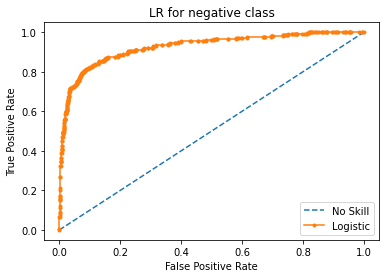

In [238]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the LR model is for negative class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy COVID INDIA of the LR model is for neutral class 0.8973063973063973
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.897


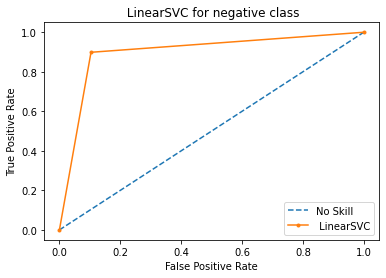

In [254]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC(max_iter=5000)
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy COVID INDIA  of the MLP  negative model is 0.9040404040404041
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.902


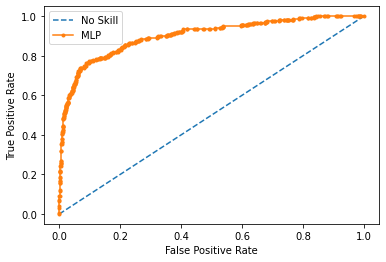

In [240]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = MLPClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the MLP  negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy COVID INDIA  of the RandomForestClassifier negative model is 0.9264870931537598
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


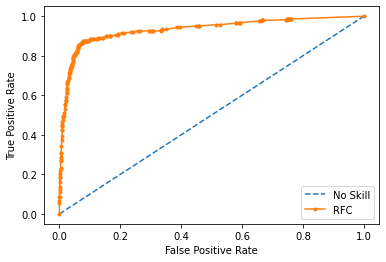

In [242]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the RandomForestClassifier negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [243]:
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy COVID INDIA  of the RandomForestClassifier positive model is 0.9079685746352413
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.955


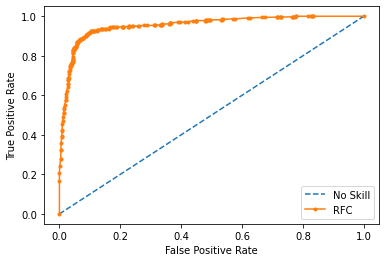

In [244]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the RandomForestClassifier positive model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [245]:
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=uint8)

Accuracy COVID INDIA  of the RandomForestClassifier neutral model is 0.9062850729517397
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.959


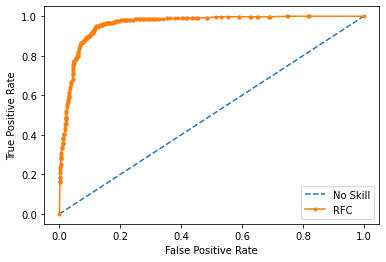

In [246]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy COVID INDIA  of the RandomForestClassifier neutral model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()